# Implementação do AG

Algoritmo Genético implementado em Python com uso do Numpy.

In [1]:
import seaborn as sns
from lib.AG import AG

<AxesSubplot:>

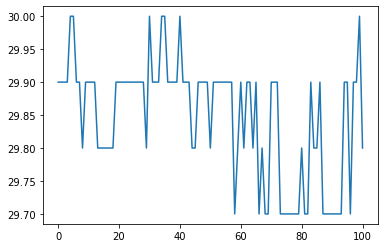

In [39]:
pesos = [3.5, 5.4, 4.7, 1.9, 5.6, 1.3, 3.8, 5.4 , 6.0, 4.6]

# Inicialização do algoritmo
ag = AG(100, 10, GERACAO=100)
ag.set_capacidade(30.0)
ag.set_pesos(pesos)
melhores = ag.evolucao()

# melhores
sns.lineplot(data=melhores[:,0])

In [40]:
melhores[melhores[:,0].argmax()]

array([30.0, array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0])], dtype=object)

In [35]:
import numpy as np
controle = np.array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

print("Diga para inversão do array de controle:")
controle_invertido = (~controle)+2

print(controle, controle_invertido)

Diga para inversão do array de controle:
[1 1 0 0 0 0 0 0 1 1] [0 0 1 1 1 1 1 1 0 0]


In [37]:
print("Filtrando os livros não utilizados: ")
pesos * controle_invertido

Filtrando os livros não utilizados: 


array([0. , 0. , 4.7, 1.9, 5.6, 1.3, 3.8, 5.4, 0. , 0. ])